In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-marketing.csv


Banking dataset that helps running a campaign.
how do banks select target customers so that chances of selling their product maximize, this will help you understand these things.

Try to build a classification model that predicts if the customer will buy the product or not!
Age group:
10 - 19 = 1

20 - 29 = 2

30 - 39 = 3

40 - 49 = 4

50 - 59 = 5

60 - 69 = 6

70 - 79 = 7

80 - 89 = 8

90 - 99 = 9


age:
age of the customer.

age group:
what age group does the customer lie

eligible:
if the customer is eligible for the talk or not.

job:
what does the customer do?

salary:
salary of the customer

marital:
married or not?

education:
level of education complitrd

marital-education:
married or not- education.

targeted:
if the customer or being targeted or not

default:
if the customer in default list or not

balance:
remaining balance in their accounts

housing:
housing

loan:
has prior loan or not

contact:
source of this information

day:
today's date

month:
month

duration:
number of days

campaign:
marketing camoaign

pdays:
number of days that passed by after the client was last contacted

previous:
previous response

poutcome:
outcome of the previous marketing campaign

y:
yes or no

response:
response of the actor































In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics  import accuracy_score,classification_report,roc_auc_score,plot_roc_curve,plot_precision_recall_curve
from sklearn.decomposition import PCA
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/kaggle/input/bank-marketing/bank-marketing.csv')

In [4]:
data

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,Y,technician,60000,married,tertiary,married-tertiary,yes,no,...,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,7,N,retired,55000,divorced,primary,divorced-primary,yes,no,...,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,7,N,retired,55000,married,secondary,married-secondary,yes,no,...,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,5,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,...,telephone,17,nov,508,4,-1,0,unknown,no,0


## EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [6]:
data.describe(include=np.number)

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.645861,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,1.083271,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,9.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [7]:
data.describe(include=object)

,eligible,job,marital,education,marital-education,targeted,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,2,12,3,4,12,2,2,2,2,3,12,4,2
top,Y,blue-collar,married,secondary,married-secondary,yes,no,yes,no,cellular,may,unknown,no
freq,43380,9732,27214,23202,13770,37091,44396,25130,37967,29285,13766,36959,39922


In [8]:
data.isnull().sum() # no missing value is found

age                  0
age group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

In [9]:
data.columns

Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'targeted', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'response'],
      dtype='object')

In [10]:
num_var=data.select_dtypes(include=np.number).columns.to_list()
cat_var=data.select_dtypes(include=object).columns.to_list()

In [11]:
data1=data.copy()# just to retain the original data

### UNIVARIATE ANALYSIS

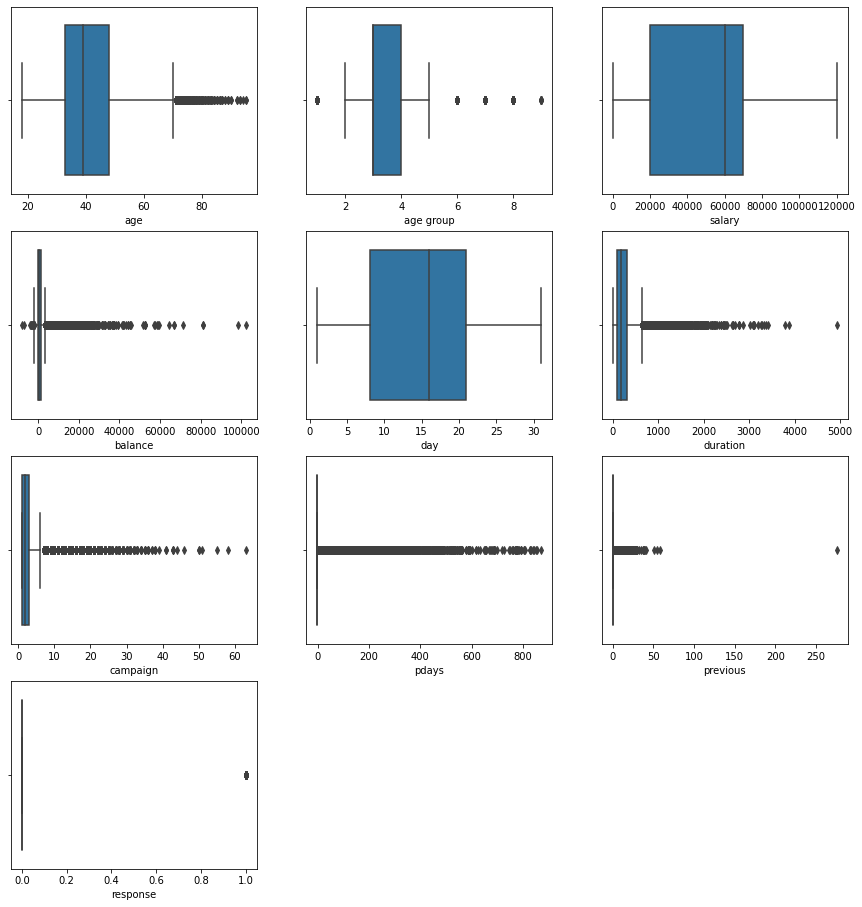

In [12]:
i=1
plt.figure(figsize=(15,20))
for j in num_var:
    plt.subplot(5,3,i)
    sns.boxplot(data=data1,x=j)
    i+=1

#### we can see that the data is containing some outlier ,lets remove these outliers

In [13]:
def outlier_tret(x):
    upper=x.quantile(0.98)
    lower=x.quantile(0.2)
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

In [14]:
data1[num_var]=data1[num_var].apply(lambda x: outlier_tret(x))

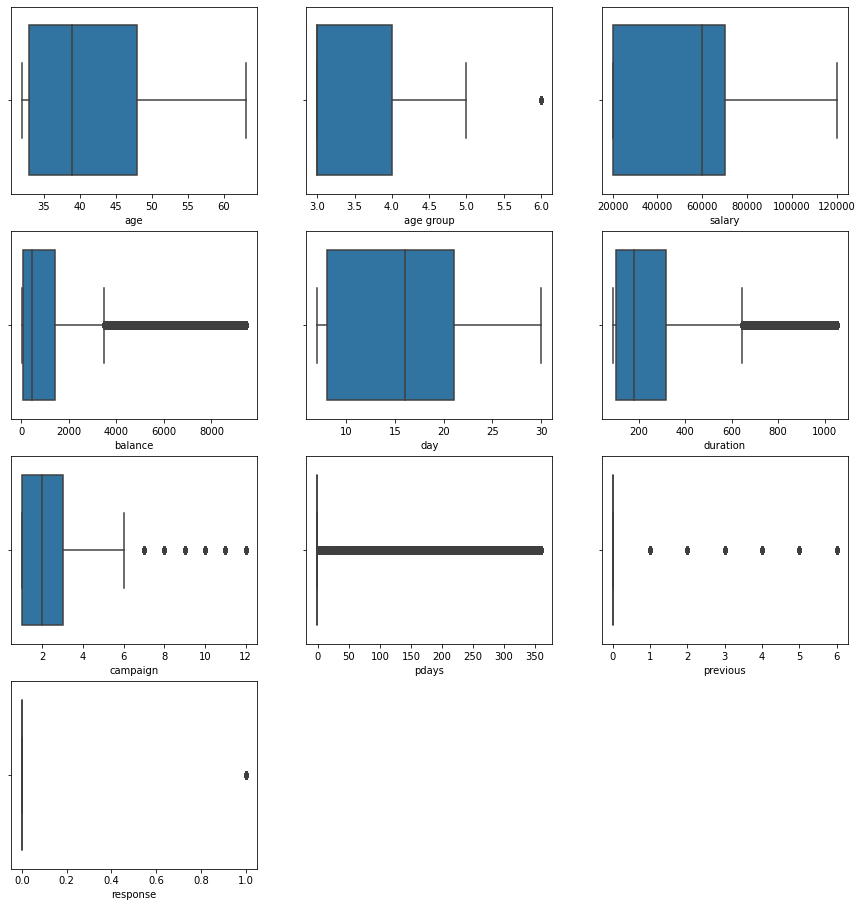

In [15]:
i=1
plt.figure(figsize=(15,20))
for j in num_var:
    plt.subplot(5,3,i)
    sns.boxplot(data=data1,x=j)
    i+=1

#### ouliers has been removed 

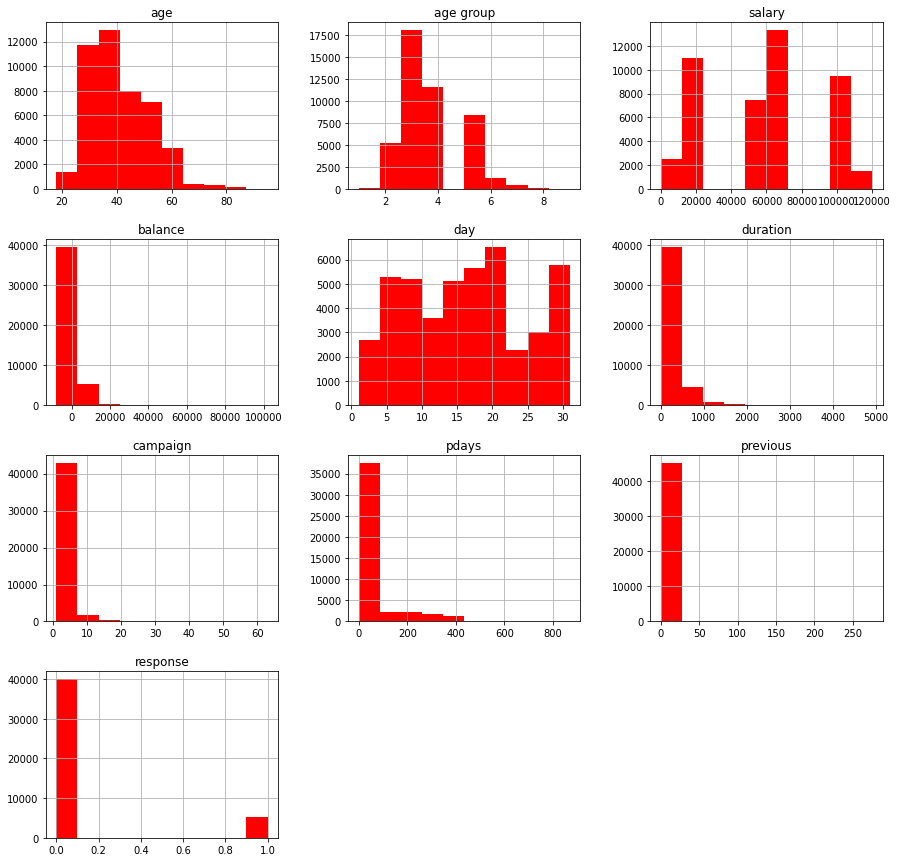

In [16]:
data.hist(figsize=(15,15),color='red')
plt.show()

### BIVARIATE ANALYSIS

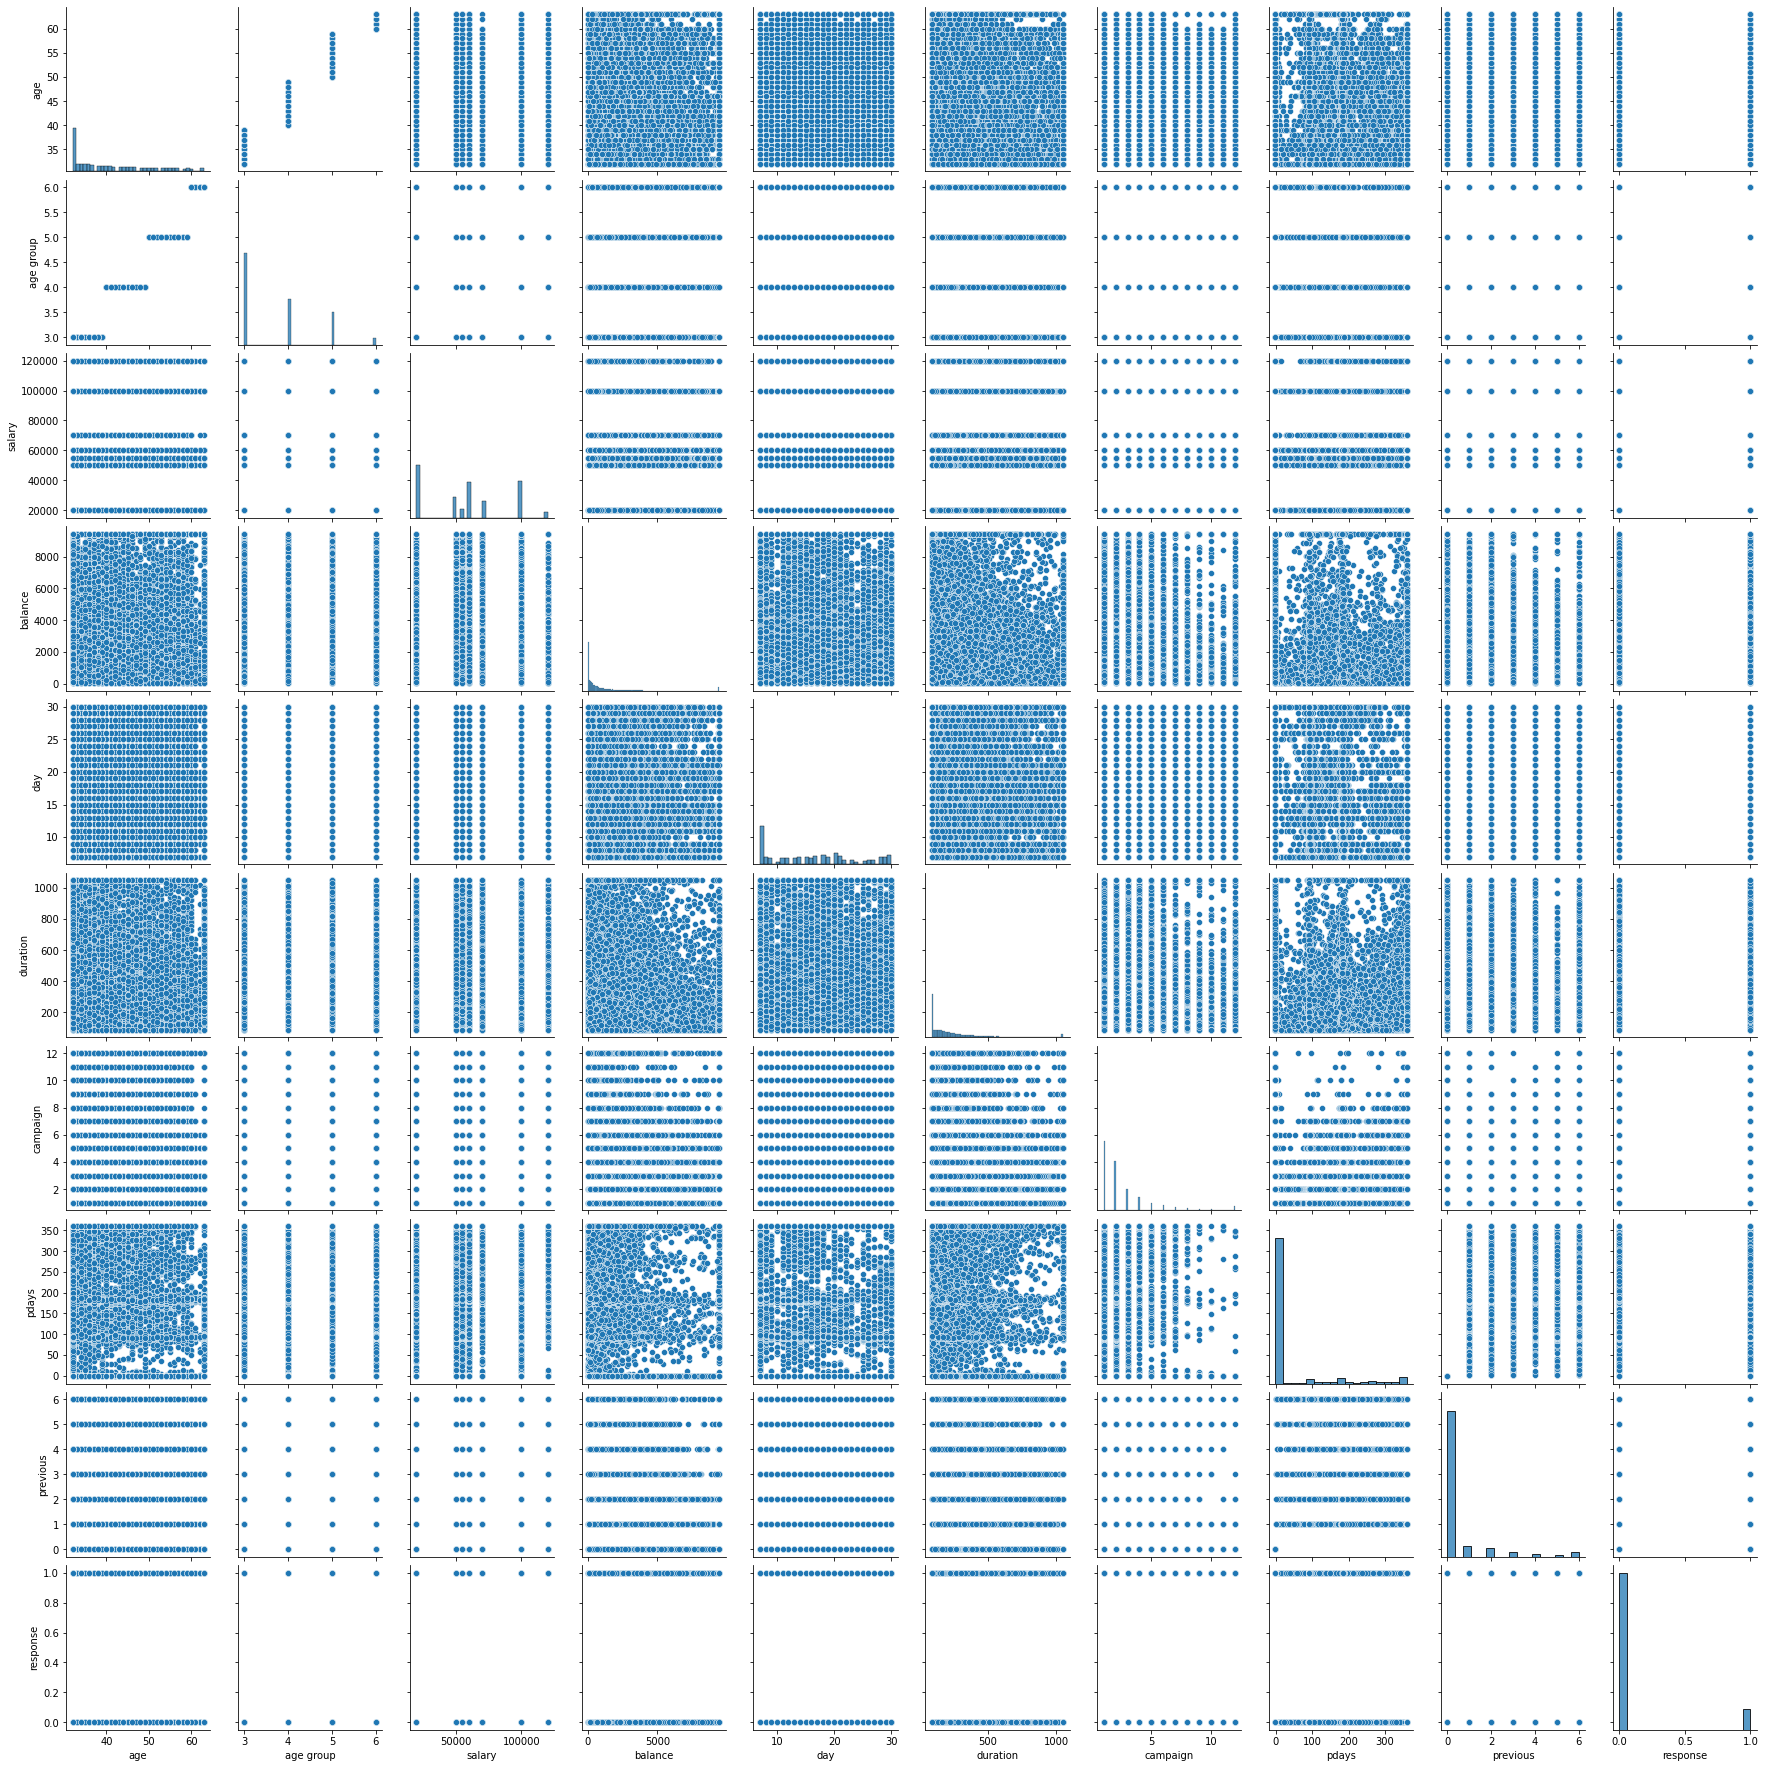

In [17]:
sns.pairplot(data=data1)

In [18]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

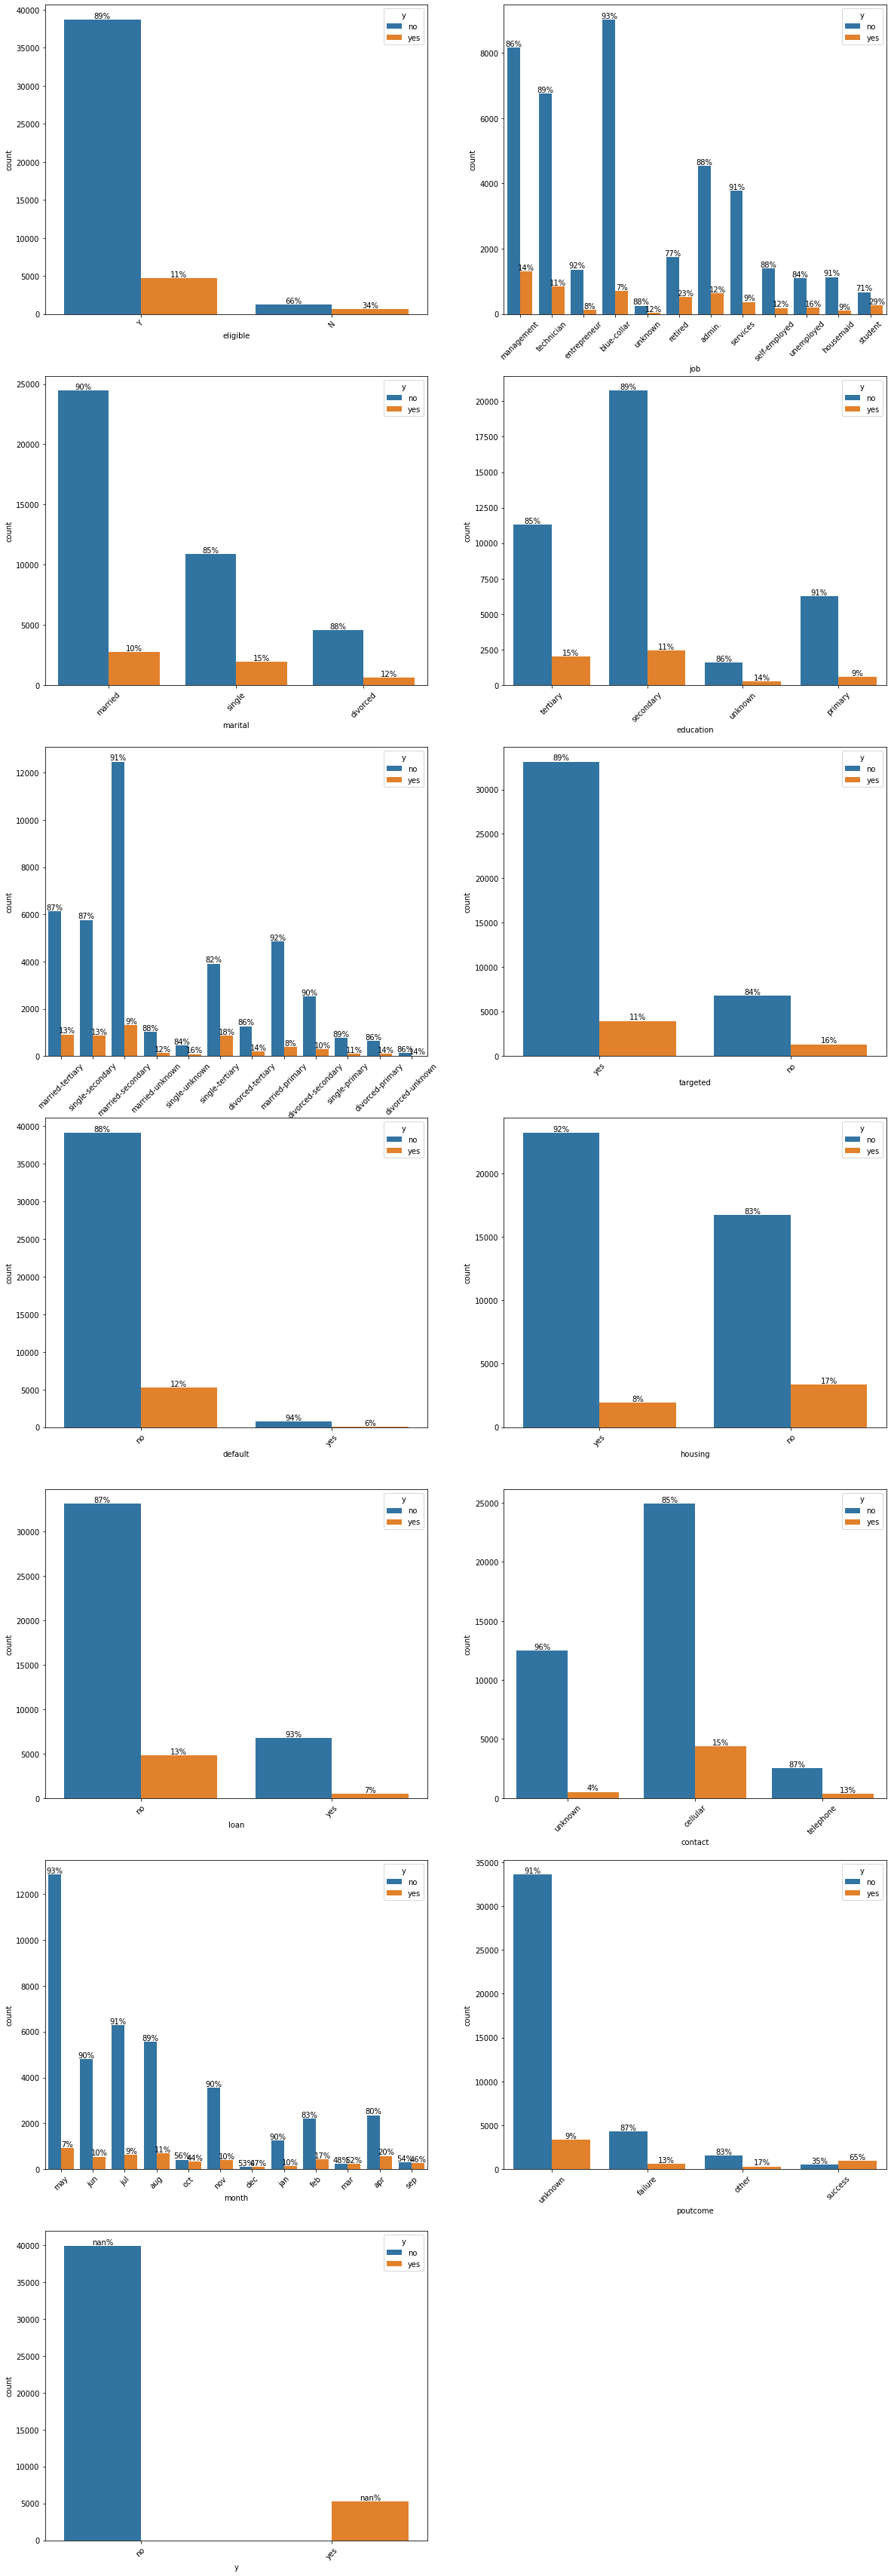

In [19]:
i=1
plt.figure(figsize=(20,80))
for col in cat_var:
    plt.subplot(9,2,i)
    ax=sns.countplot(data=data1,x=col,hue='y')
    barPerc(df=data1,xVar=col,ax=ax)
    plt.xticks(rotation=45)
    i+=1

#### from above plot we can make an inference about the  specific type of customer who are more willing to buy the product.
#### So we will choose only those category where the yes% is high, means more % of customer in that category are willing to buy the product 
 
#### 1- eligible         : No 
#### 2- job              : student
#### 3- marital          : single
#### 4- education        : tertiary
#### 5-marital education :married tertiary,single secondary
#### 6-targeted          : NO
#### 7-default           : NO
#### 8-housing           :NO
#### 9-loan               :NO
#### 10-contact           :cellular
#### 11-month             : april
#### 12-poutcome          : success
#### So these are the group of customer where  they is more chance of getting sell of product ,so we should first target them.

In [20]:
num_var

['age',
 'age group',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'response']

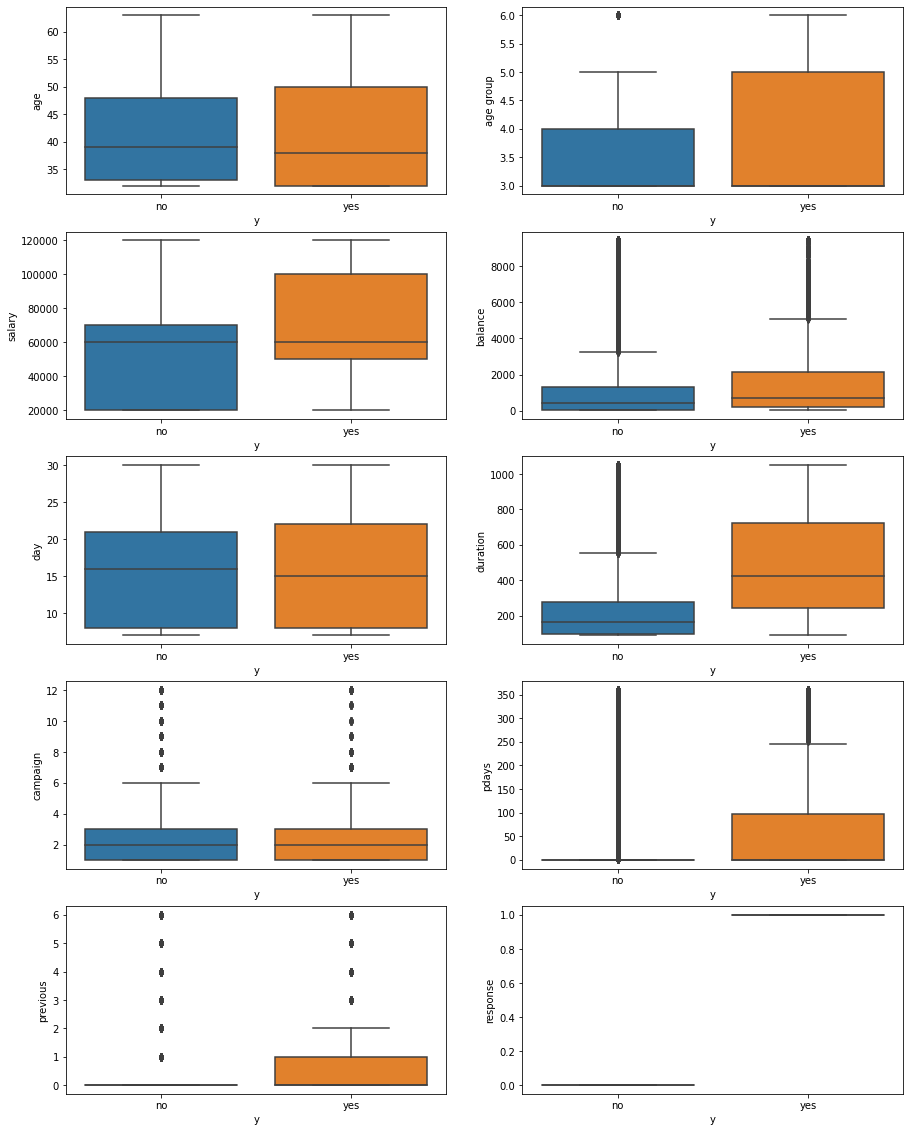

In [21]:
i=1
plt.figure(figsize=(15,20))
for j in num_var:
    plt.subplot(5,2,i)
    sns.boxplot(data=data1,x='y',y=j)
    i+=1
    

#### the mean age of the group of customer who is buyer of product yes or no ,is seem to be the equal ,so lets apply t-test to check whether mean age  for both category is same  or not

In [22]:
age_yes=data1.groupby(by='y').get_group('yes')[['age']]
age_no=data1.groupby(by='y').get_group('no')[['age']]
p=stats.ttest_ind(age_no,age_yes)
print(age_yes.mean())
print(age_no.mean())
print(p)

age    42.147854
dtype: float64
age    41.418416
dtype: float64
Ttest_indResult(statistic=array([-5.42847781]), pvalue=array([5.7128543e-08]))


#### we get p-value<.05,which means that the mean age of both group is significantly different ,so the higher age person are more likely to buy the product. 

In [23]:
age_group_yes=data1.groupby(by='y').get_group('yes')[['age group']]
age_group_no=data1.groupby(by='y').get_group('no')[['age group']]
p=stats.ttest_ind(age_group_no,age_group_yes)
print(age_group_yes.mean())
print(age_group_no.mean())
print(p)

age group    3.838155
dtype: float64
age group    3.736286
dtype: float64
Ttest_indResult(statistic=array([-7.80217104]), pvalue=array([6.21512532e-15]))


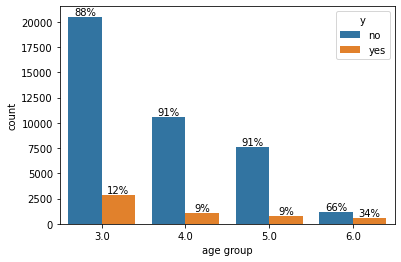

In [24]:
ax=sns.countplot(data=data1,x='age group',hue='y')
barPerc(df=data1,xVar='age group',ax=ax)

#### p-value is less than 0.05, which means that both group of age group is different, the age group 6 -(60-69) is more likely to buy the product

In [25]:
salary_yes=data1.groupby(by='y').get_group('yes')[['salary']]
salary_no=data1.groupby(by='y').get_group('no')[['salary']]
p=stats.ttest_ind(salary_no,salary_yes)
print(salary_yes.mean())
print(salary_no.mean())
print(p)

salary    60253.356022
dtype: float64
salary    57612.093582
dtype: float64
Ttest_indResult(statistic=array([-5.86308168]), pvalue=array([4.57503598e-09]))


#### here p-value is less than 0.05, so the mean salary for the both group (yes ,no) is significantly different,so we coclude that higher salary earning customer are more willing to buy the product

In [26]:
balance_yes=data1.groupby(by='y').get_group('yes')[['balance']]
balance_no=data1.groupby(by='y').get_group('no')[['balance']]
p=stats.ttest_ind(balance_no,balance_yes)
print(balance_yes.mean())
print(balance_no.mean())
print(p)

balance    1630.06765
dtype: float64
balance    1200.083568
dtype: float64
Ttest_indResult(statistic=array([-14.88468652]), pvalue=array([5.44509733e-50]))


#### customer having higher balance is more willing to by the product

In [27]:
duration_yes=data1.groupby(by='y').get_group('yes')[['duration']]
duration_no=data1.groupby(by='y').get_group('no')[['duration']]
p=stats.ttest_ind(duration_no,duration_yes)
print(duration_yes.mean())
print(duration_no.mean())
print(p)

duration    502.75553
dtype: float64
duration    225.797981
dtype: float64
Ttest_indResult(statistic=array([-95.98444169]), pvalue=array([0.]))


#### higher the duration ,higher the chance of product selling

In [28]:
cam_yes=data1.groupby(by='y').get_group('yes')[['campaign']]
cam_no=data1.groupby(by='y').get_group('no')[['campaign']]
p=stats.ttest_ind(cam_no,cam_yes)
print(cam_yes.mean())
print(cam_no.mean())
print(p)

campaign    2.116468
dtype: float64
campaign    2.700165
dtype: float64
Ttest_indResult(statistic=array([17.28805734]), pvalue=array([9.49442203e-67]))


#### lower the marketing campaign,higher the chance of selling product
#### greater the previous campaign response greater the chance of selling the product

In [29]:
data2=data1.copy() # to retain the data1

## FEATURE ENGINEERING

#### age and age group are the same so we will keep only age

In [30]:
data2.drop(columns='age group',inplace=True)

In [31]:
data2=pd.get_dummies(data=data2,columns=cat_var,drop_first=True)

In [32]:
data2

,age,salary,balance,day,duration,campaign,pdays,previous,response,eligible_Y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58.0,100000.0,2143.0,7.0,261.0,1.0,-1.0,0.0,0.0,1,...,0,0,1,0,0,0,0,0,1,0
1,44.0,60000.0,29.0,7.0,151.0,1.0,-1.0,0.0,0.0,1,...,0,0,1,0,0,0,0,0,1,0
2,33.0,120000.0,22.0,7.0,89.0,1.0,-1.0,0.0,0.0,1,...,0,0,1,0,0,0,0,0,1,0
3,47.0,20000.0,1506.0,7.0,92.0,1.0,-1.0,0.0,0.0,1,...,0,0,1,0,0,0,0,0,1,0
4,33.0,20000.0,22.0,7.0,198.0,1.0,-1.0,0.0,0.0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825.0,17.0,977.0,3.0,-1.0,0.0,1.0,1,...,0,0,0,1,0,0,0,0,1,1
45207,63.0,55000.0,1729.0,17.0,456.0,2.0,-1.0,0.0,1.0,0,...,0,0,0,1,0,0,0,0,1,1
45208,63.0,55000.0,5715.0,17.0,1051.0,5.0,184.0,3.0,1.0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57.0,20000.0,668.0,17.0,508.0,4.0,-1.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0


In [33]:
corr=data2.corr()[['y_yes']].sort_values(by='y_yes',ascending=False)

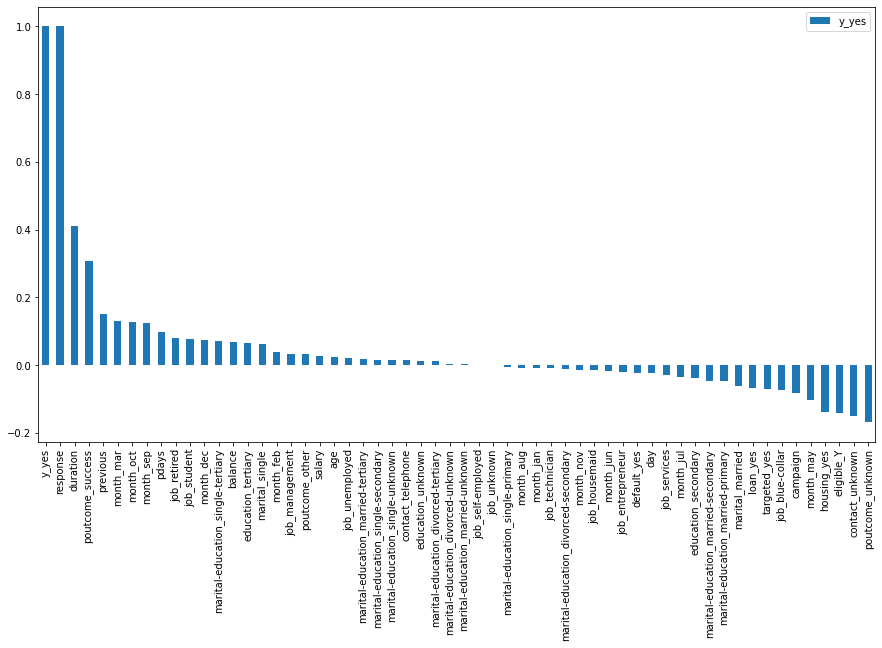

In [34]:

corr.plot(kind='bar',figsize=(15,8))
plt.show()

#### here we can see the correlation of different variables with y_yes

In [35]:
sc=StandardScaler()

In [36]:
num_var.remove('age group') # removing age group

In [37]:
scaled=sc.fit_transform(data2[num_var])
scaled=pd.DataFrame(scaled,columns=num_var)
scaled_data=pd.concat([scaled,data2.drop(columns=num_var)],axis=1)

In [38]:
scaled_data1=scaled_data.drop(columns='y_yes')

In [39]:
scaled_data1

,age,salary,balance,day,duration,campaign,pdays,previous,response,eligible_Y,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.795858,1.366321,0.451054,-1.222069,0.012952,-0.704945,-0.420463,-0.384567,-0.363983,1,...,0,0,0,1,0,0,0,0,0,1
1,0.271753,0.067503,-0.617188,-1.222069,-0.495493,-0.704945,-0.420463,-0.384567,-0.363983,1,...,0,0,0,1,0,0,0,0,0,1
2,-0.925758,2.015729,-0.620725,-1.222069,-0.782071,-0.704945,-0.420463,-0.384567,-0.363983,1,...,0,0,0,1,0,0,0,0,0,1
3,0.598347,-1.231314,0.129167,-1.222069,-0.768204,-0.704945,-0.420463,-0.384567,-0.363983,1,...,0,0,0,1,0,0,0,0,0,1
4,-0.925758,-1.231314,-0.620725,-1.222069,-0.278248,-0.704945,-0.420463,-0.384567,-0.363983,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.033806,0.067503,-0.214955,0.092479,3.322469,0.159021,-0.420463,-0.384567,2.747384,1,...,0,0,0,0,1,0,0,0,0,1
45207,2.340182,-0.094849,0.241853,0.092479,0.914287,-0.272962,-0.420463,-0.384567,2.747384,0,...,0,0,0,0,1,0,0,0,0,1
45208,2.340182,-0.094849,2.256049,0.092479,3.664514,1.022987,1.516325,1.992281,2.747384,0,...,0,0,0,0,1,0,0,0,1,0
45209,1.686994,-1.231314,-0.294290,0.092479,1.154643,0.591004,-0.420463,-0.384567,-0.363983,1,...,0,0,0,0,1,0,0,0,0,1


In [40]:
pca=PCA()

In [41]:
model=pca.fit_transform(scaled_data1)
model

array([[-3.36416910e-01,  1.28196230e+00, -6.17026773e-01, ...,
        -4.06483469e-15,  8.60226249e-16, -3.84049929e-15],
       [-4.42926121e-01, -7.14614382e-01,  2.72907155e-01, ...,
         1.29405195e-15,  9.45834565e-16,  4.32728515e-15],
       [-5.00723388e-01,  5.33983446e-02, -9.19259714e-01, ...,
         8.79651166e-17, -9.56028043e-16,  8.21034885e-16],
       ...,
       [ 3.59084675e+00,  2.74259933e+00,  2.50593409e+00, ...,
        -2.41980199e-17, -4.36930596e-17,  2.15503012e-17],
       [-6.82699034e-01, -4.95993458e-01,  1.52365883e+00, ...,
         2.81826675e-17, -2.22626743e-17, -3.22627815e-17],
       [ 4.01101336e+00,  3.44041382e-01, -1.94805336e+00, ...,
         6.29220937e-17,  1.58842991e-16,  6.25167263e-17]])

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1480044 , 0.25663645, 0.35927342, 0.4503548 , 0.5335163 ,
       0.6031126 , 0.66538547, 0.71127972, 0.74968438, 0.78153289,
       0.8088429 , 0.83131421, 0.84736763, 0.86221639, 0.87540349,
       0.8869911 , 0.89759606, 0.90726638, 0.91600231, 0.92418681,
       0.93174995, 0.93840672, 0.94469766, 0.94986868, 0.95450811,
       0.95884086, 0.96292979, 0.96669308, 0.97005195, 0.97328435,
       0.97600135, 0.97864436, 0.98108353, 0.98326673, 0.98534098,
       0.98730981, 0.98896574, 0.99054285, 0.99188814, 0.99318613,
       0.99437483, 0.9954202 , 0.9963345 , 0.99717346, 0.99788731,
       0.99853199, 0.99898506, 0.99939502, 0.99972665, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [43]:
feature=range(pca.n_components_)

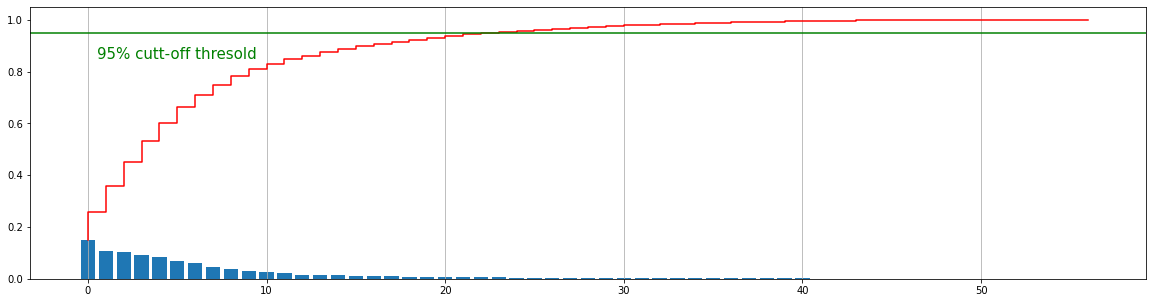

In [44]:
plt.figure(figsize=(20,5))
plt.bar(feature,pca.explained_variance_ratio_)
plt.step(feature,np.cumsum(pca.explained_variance_ratio_),color='red')
plt.axhline(y=.95,color='green')
plt.grid(axis='x')
plt.text(0.5,.85,'95% cutt-off thresold',color='green',fontsize=15)
plt.show()

In [45]:
pca1=PCA(n_components=25,whiten=True)

In [46]:
model=pca1.fit_transform(scaled_data1)

In [47]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.1480044 , 0.25663645, 0.35927342, 0.4503548 , 0.5335163 ,
       0.6031126 , 0.66538547, 0.71127972, 0.74968438, 0.78153289,
       0.8088429 , 0.83131421, 0.84736763, 0.86221639, 0.87540349,
       0.8869911 , 0.89759606, 0.90726637, 0.91600228, 0.92418677,
       0.93174991, 0.93840667, 0.94469757, 0.94986834, 0.95450719])

### MODEL BUILDING

In [48]:
Y=scaled_data[['y_yes']]

In [49]:
Y.value_counts()# ratio is 1:8 so it is not imbalance classification problem

y_yes
0        39922
1         5289
dtype: int64

In [50]:
x_train,x_test,y_train,y_test=train_test_split(model,Y,test_size=.3,random_state=0)

In [51]:
lg=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
nb=GaussianNB()
knn=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
adb=AdaBoostClassifier()
sgd=SGDClassifier()
svc=SVC()
mlpc=MLPClassifier()

In [52]:
algo=[lg,dt,rf,nb,knn,adb,sgd,svc,mlpc]

In [53]:
for i in algo:
    i.fit(x_train,y_train)
    acc=i.score(x_test,y_test)
    print(acc,i)

1.0 LogisticRegression()
0.997714538484223 DecisionTreeClassifier()
0.9999262754349749 RandomForestClassifier()
0.9927012680625185 GaussianNB()
0.9960925980536715 KNeighborsClassifier()
1.0 AdaBoostClassifier()
1.0 SGDClassifier()
1.0 SVC()
1.0 MLPClassifier()


#### we choose decision tree classifier model

In [54]:
dt1=DecisionTreeClassifier()

In [55]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred=dt1.predict(x_test)

In [57]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11971
           1       0.99      0.99      0.99      1593

    accuracy                           1.00     13564
   macro avg       0.99      0.99      0.99     13564
weighted avg       1.00      1.00      1.00     13564



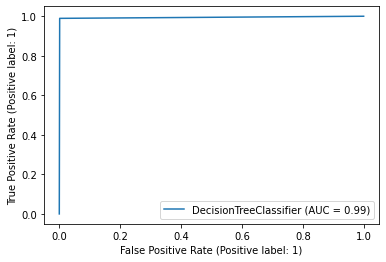

In [58]:
plot_roc_curve(dt1,x_test,y_test)

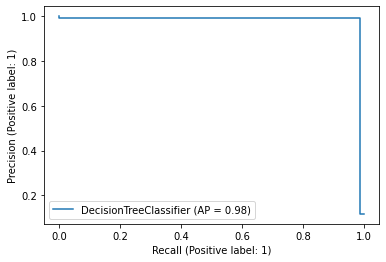

In [59]:
plot_precision_recall_curve(dt1,x_test,y_test)